# INFO-F-422 -  Statistical Foundations of Machine Learning 

### AMSSAFI Brahim - __[brahim.amssafi@ulb.be](mailto:brahim.amssafi@ulb.be) - Student ID 000470575__
### DECLEIRE Damien - __[Damien.Decleire@ulb.be](mailto:Damien.Decleire@ulb.be) - Student ID 000515451__
### GJINI Jurgen - __[Jurgen.Gjini@ulb.be](mailto:Jurgen.Gjini@ulb.be) - Student ID 000426235__

### Video presentation: https://www.youtube.com/watch?v=C9_TaED_ZbA&ab_channel=ChocoKingTM
### The we transfer link to the video : https://we.tl/t-1620Mbp9iM
### 45.6 MB - mp4 - 11:25 

## Competition : Pump it Up: Data Mining the Water Table


## Table of contents :
* [1. Data pre-processing](#1-bullet)
* [1.1 Loading the data](#2-bullet)
* [1.2 Missing value imputation](#3-bullet)
* [1.3 Feature engineering](#4-bullet)
* [1.4 Conversion to numeric encoding and normalization of the data](#5-bullet)
* [1.5 Feature selection](#6-bullet)
* [2. Model selection procedure](#7-bullet)
* [2.1 Sampling training and test sets for cross validation](#8-bullet)
* [2.2 Learning methods](#9-bullet)

* [2.2.1 Lazy (nearest neighbours)](#10-bullet)
* [2.2.2 randomForest (random forest)](#11-bullet)
* [2.2.3 tree/rpart (decision trees)](#12-bullet)
* [3. Create models based on other R packages](#13-bullet)
* [3.1 Caret](#14-bullet)
* [3.2 Neural Net](#15-bullet)

# 1. Data pre-processing <a class="anchor" id="1-bullet"></a>

## 1.1 Loading the data <a class="anchor" id="2-bullet"></a>

The first step before doing any manipulation on the data is to get a first hand look at our csv files that we will use to train our model.

### Training set values

In [100]:
install.packages("plyr")
install.packages("dplyr")
install.packages("data.table")
install.packages("ggplot2")
install.packages("corrplot")
install.packages("base")
install.packages("class")
install.packages("randomForest")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("neuralnet")
install.packages("caret")
install.packages("caret", dependencies=c("Depends", "Suggests"))
library(plyr)
library(dplyr)
library(data.table)
library(ggplot2)
library(corrplot)
library(base)
library(class)
library(randomForest)
library(rpart.plot)
library(rpart)
library(caret)
library(neuralnet)

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"Loading required package: rpart
Warning message:
"package 'rpart' was built under R version 3.6.3"

In [2]:
v_data <- read.csv("training_set_values.csv")
dim(v_data)

[1] 59400    40

Our training set includes 59400 rows with 39 variables (if we do not take id into account).

In [3]:
head(v_data)

id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe


### Training set labels

In [4]:
l_data <- read.csv("training_set_labels.csv")
dim(l_data)

[1] 59400     2

In [5]:
summary(l_data[,2])

functional functional needs repair          non functional 
                  32259                    4317                   22824

### Test set values

In [6]:
t_data <- read.csv("test_set_values.csv")
dim(t_data)
dim(intersect(t_data,v_data))
head(t_data)
summary(t_data)

[1] 14850    40

[1]  0 40

id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
50785,0,2013-02-04,Dmdd,1996,DMDD,35.29080,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0,2013-02-04,Government Of Tanzania,1569,DWE,36.65671,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0,2013-02-01,,1567,,34.76786,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0,2013-01-22,Finn Water,267,FINN WATER,38.05805,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500,2013-03-27,Bruder,1260,BRUDER,35.00612,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
52449,0,2013-03-04,Government Of Tanzania,1685,DWE,36.68528,-3.302420,Masaga,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


       id          amount_tsh          date_recorded  
 Min.   :   10   Min.   :     0.0   2013-02-03:  138  
 1st Qu.:18727   1st Qu.:     0.0   2011-03-16:  137  
 Median :37362   Median :     0.0   2011-03-17:  137  
 Mean   :37162   Mean   :   322.8   2011-03-18:  130  
 3rd Qu.:55800   3rd Qu.:    25.0   2011-03-14:  129  
 Max.   :74249   Max.   :200000.0   2011-03-15:  122  
                                    (Other)   :14057  
                    funder       gps_height          installer   
 Government Of Tanzania:2215   Min.   : -57.0   DWE       :4349  
                       : 869   1st Qu.:   0.0             : 877  
 Danida                : 793   Median : 344.0   Government: 457  
 Hesawa                : 580   Mean   : 655.1   RWE       : 292  
 World Bank            : 352   3rd Qu.:1308.0   Commu     : 287  
 Kkkt                  : 336   Max.   :2777.0   DANIDA    : 255  
 (Other)               :9705                    (Other)   :8333  
   longitude        latitude    

The test set includes 14850 rows and is completely independent from the training set.

## 1.2 Missing value imputation <a class="anchor" id="3-bullet"></a>


In [7]:
processed_data <- v_data

### Numerical values

In [8]:
# Those categories are classified as numerical first but they are in fact categories and we need to convert them manually
processed_data$region_code <- factor(processed_data$region_code,levels=unique(processed_data$region_code))
processed_data$district_code <- factor(processed_data$district_code,levels=unique(processed_data$district_code))
processed_data$construction_year <- factor(processed_data$construction_year,levels=unique(processed_data$construction_year))

numerical_variables <-c('amount_tsh','gps_height','longitude','latitude','population')

### Numerical missing value imputation
For numerical categories it is harder to automatically detect unknown values, for example a 0 value for gps_height could either mean 0 meters or unknown gps_height value. Same thing can be said for population and amount_tsh.

#### Longitude, latitude and gps_height
For unknown latitude, longitude, gps height values, instead of using the general mean of the data, we will use the mean of the values that share at least 2 similar geographic values such as subvillage, region_code and district_code, if no row shares at least 2 similar values, we will cut it down to at least 1 similar value.

In [9]:
# Filter function that returns us the means of the geographical properties of near spots
mean_near_locations <- function(unknown_id,result){
    x <- filter(processed_data, id %in% unknown_id)
    x <- select(x,id,district_code,region_code,subvillage,gps_height, longitude,latitude)
    filter2 <- filter(processed_data, (district_code %in% x$district_code & region_code %in% x$region_code) | (region_code %in% x$region_code & subvillage %in% x$subvillage))
    near_locations_1 <- select(filter2,id,district_code,region_code,subvillage,gps_height, longitude,latitude )
    near_locations_2 <- filter(near_locations_1, !(id %in% x$id) & longitude != 0 & gps_height != 0)
    near_locations_2 <- select(near_locations_2,id,gps_height, longitude,latitude )
    

    if (length(near_locations_2[,"id"]) == 0 ){
        near_locations_2 <- filter(near_locations_1, !(id %in% x$id) & longitude != 0)
        if (length(near_locations_2[,"id"] == 0)){
            filter2 <- filter(processed_data, (district_code %in% x$district_code | region_code %in% x$region_code | subvillage %in% x$subvillage ))
            near_locations_1 <- select(filter2,id,district_code,region_code,subvillage,gps_height, longitude,latitude )
            near_locations_2 <- filter(near_locations_1, !(id %in% x$id) & longitude != 0)
        }
    }
    r = select(near_locations_2,id,gps_height, longitude,latitude)
    result <-sapply(r[, 2:4], mean, na.rm=T)
    
}



#### Example 
Let's illustrate this missing value imputation with 5 rows that have missing latitude and longitude.

In [10]:
filter_1 <- filter(processed_data, id == 6091 | id == 32376  | id == 45415 | id == 13042 | id == 59713)
unknown_pos <- select(filter_1,id)
new_pos_values <- select(filter_1,id,gps_height, longitude,latitude)
new_pos_values


id,gps_height,longitude,latitude
6091,0,0,-2e-08
32376,0,0,-2e-08
13042,0,0,-2e-08
59713,0,0,-2e-08
45415,0,0,-2e-08


In [11]:
estimated_positions <- apply(unknown_pos,1,mean_near_locations)
estimated_positions_df <- as.data.frame(t(estimated_positions))
new_pos_values[,2:4] <- estimated_positions_df
new_pos_values

id,gps_height,longitude,latitude
6091,1350.9817,34.16823,-2.965355
32376,1183.4444,32.96041,-1.974534
13042,783.6842,34.51817,-4.768703
59713,288.5721,34.28975,-4.526132
45415,1350.9817,34.16823,-2.965355


We now do this for the whole file and plot the new coordinates on a map to see if values seem logical.

In [12]:
filter_1 <- filter(processed_data, latitude == 0 | longitude == 0)
unknown_pos <- select(filter_1,id)
new_pos_values <- select(filter_1,id,gps_height, longitude,latitude)
estimated_positions <- apply(unknown_pos,1,mean_near_locations)
estimated_positions_df <- as.data.frame(t(estimated_positions))
new_pos_values[,2:4] <- estimated_positions_df

In [13]:
summary(new_pos_values[,2:4])

   gps_height       longitude        latitude     
 Min.   : 287.2   Min.   :32.89   Min.   :-9.165  
 1st Qu.:1211.0   1st Qu.:34.17   1st Qu.:-2.965  
 Median :1351.0   Median :34.17   Median :-2.965  
 Mean   :1202.4   Mean   :34.18   Mean   :-3.315  
 3rd Qu.:1351.0   3rd Qu.:34.17   3rd Qu.:-2.965  
 Max.   :1767.9   Max.   :34.75   Max.   :-1.925  
 NA's   :379      NA's   :379     NA's   :379     

We see that some values are still missing, those will be replaced by the general mean since their position can't be interpolated with the available variables.



In [14]:
nm1 <- c("gps_height","longitude","latitude")
nm2 <- paste0("i.", nm1)
setDT(processed_data)[new_pos_values, (nm1) := mget(nm2), on = .(id, id)]

Warning message in `[.data.table`(setDT(processed_data), new_pos_values, `:=`((nm1), :
"1350.981707 (type 'double') at RHS position 1 truncated (precision lost) when assigning to type 'integer' (column 5 named 'gps_height')"

In [15]:


gps_height <- processed_data[,processed_data$gps_height]
longitude <- processed_data[,processed_data$longitude]
latitude = processed_data[,processed_data$latitude]

mean_gps_height = mean(gps_height,na.rm=T)
mean_longitude = mean(longitude,na.rm=T)
mean_latitude = mean(latitude,na.rm=T)

processed_data[,'gps_height'][is.na(processed_data[,'gps_height'])] <- mean_gps_height
processed_data[,'longitude'][is.na(processed_data[,'longitude'])] <- mean_longitude
processed_data[,'latitude'][is.na(processed_data[,'latitude'])] <- mean_latitude



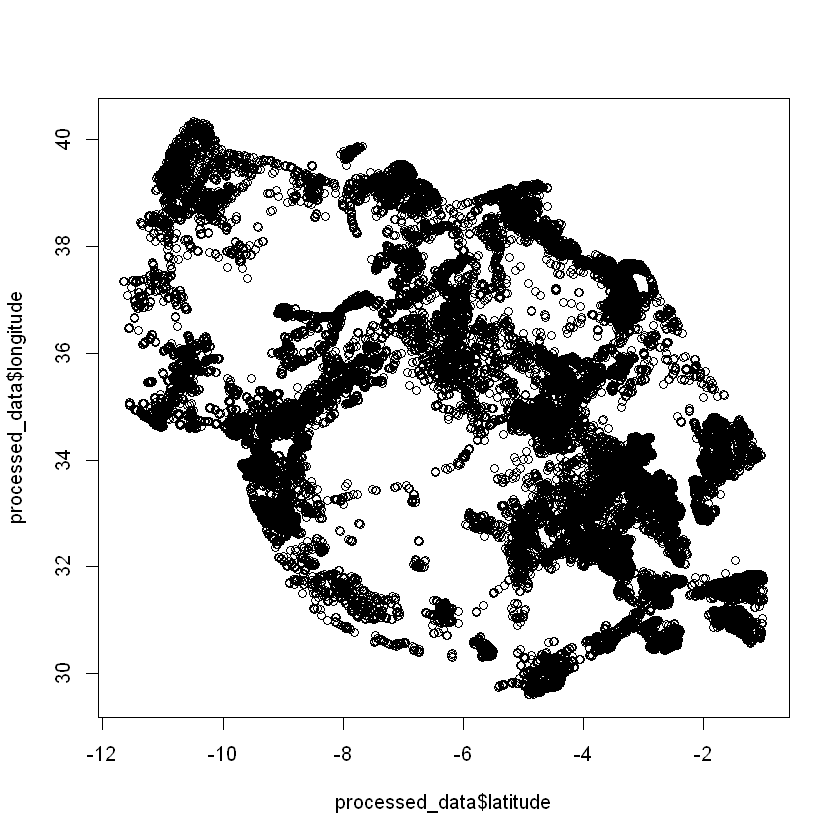

In [16]:
plot(x=processed_data$latitude,y=processed_data$longitude)

Numerical missing value imputation is now correctly done.

In [17]:
write.csv(processed_data,"processed_data.csv", row.names = FALSE)

### Categorical missing value imputation

The same process can be used for categorical missing value imputation, but it is not as straightforward as working with continuous variables. The first step is to make the unknown values uniform, in the data unknown values are not described uniformly, they can be found under names like "Unknown", "other", empty strings, etc.

#### Pre-processing

In [39]:
unknown_variable_names <- c('0','None','Unknown','unknown','Not Known','','-','none','##','other','Other')
processed_data <- read.csv("processed_data.csv")


# Those categories are classified as numerical first but they are in fact categories and we need to convert them manually
processed_data$region_code <- factor(processed_data$region_code,levels=unique(processed_data$region_code))
processed_data$construction_year <- factor(processed_data$construction_year,levels=unique(processed_data$construction_year))
processed_data$district_code <- factor(processed_data$district_code,levels=unique(processed_data$district_code))

categorical_variables <-which(sapply(processed_data[1,],class)=="factor")
categorical_variables



date_recorded                funder             installer 
                    3                     4                     6 
             wpt_name                 basin            subvillage 
                    9                    11                    12 
               region           region_code         district_code 
                   13                    14                    15 
                  lga                  ward        public_meeting 
                   16                    17                    19 
          recorded_by     scheme_management           scheme_name 
                   20                    21                    22 
               permit     construction_year       extraction_type 
                   23                    24                    25 
extraction_type_group extraction_type_class            management 
                   26                    27                    28 
     management_group               payment          payment_type 
                   29                    30                    31 
        water_quality         quality_group              quantity 
                   32                    33                    34 
       quantity_group                source           source_type 
                   35                    36                    37 
         source_class       waterpoint_type waterpoint_type_group 
                   38                    39                    40

In [40]:
unknown_variable_names <- c('0','None','Unknown','unknown','Not Known','','-','none','##','other','Other')

for (column in categorical_variables){
    for (var in unknown_variable_names){
        processed_data[,column] <- as.character(processed_data[,column])
        processed_data[,column][processed_data[,column] == var ] <- NA
        processed_data[,column] <- factor(processed_data[,column],levels = unique(processed_data[,column]))
    }
}



In [41]:
processed_data
summary(processed_data$district_code)

id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,NA,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,NA,NA,NA,communal standpipe multiple,communal standpipe
19816,0,2012-10-01,Dwsp,0,DWSP,33.36241,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
54551,0,2012-10-09,Rwssp,0,DWE,32.62062,-4.226198,Tushirikiane,0,...,NA,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
53934,0,2012-11-03,Wateraid,0,Water Aid,32.71110,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
46144,0,2011-08-03,Isingiro Ho,0,Artisan,30.62699,-1.257051,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


5     2     4    63     1     8     3     6    43     7    23    33    53 
 4356 11173  8999   195 12203  1043  9998  4074   505  3343   293   874   745 
   62    60    30    13    80    67  NA's 
  109    63   995   391    12     6    23

In [42]:
missing_categorical_data_count <- processed_data
for (column in categorical_variables){
    missing_categorical_data_count[,column] <- as.character(processed_data[,column])
    missing_categorical_data_count[,column][is.na(processed_data[,column])] <- "Missing"
    missing_categorical_data_count[,column][!(is.na(processed_data[,column]))] <- "Known"
    missing_categorical_data_count[,column] <- factor(missing_categorical_data_count[,column],levels = c("Known","Missing"))
}
stats <- summary(missing_categorical_data_count[,categorical_variables])
stats

 date_recorded       funder        installer        wpt_name    
 Known  :59400   Known  :54955   Known  :54961   Known  :55812  
 Missing:    0   Missing: 4445   Missing: 4439   Missing: 3588  
     basin         subvillage        region       region_code   
 Known  :59400   Known  :59028   Known  :59400   Known  :59400  
 Missing:    0   Missing:  372   Missing:    0   Missing:    0  
 district_code        lga             ward       public_meeting 
 Known  :59377   Known  :59400   Known  :59400   Known  :56066  
 Missing:   23   Missing:    0   Missing:    0   Missing: 3334  
  recorded_by    scheme_management  scheme_name        permit     
 Known  :59400   Known  :54756     Known  :30565   Known  :56344  
 Missing:    0   Missing: 4644     Missing:28835   Missing: 3056  
 construction_year extraction_type extraction_type_group extraction_type_class
 Known  :38691     Known  :52970   Known  :52970         Known  :52970        
 Missing:20709     Missing: 6430   Missing: 6430        

We can see that for most categories, the proportion of missing values is a small fraction of the total number of values, except for `scheme_name` and `construction_year` where a significant portion of the values are missing. We can also observe by calculating the correlation matrix that for some categories, when a value is missing in one category, it is also missing on the others. 

Warning message in cor(sapply(missing_categorical_data_count[, categorical_variables], :
"l'écart type est nulle"

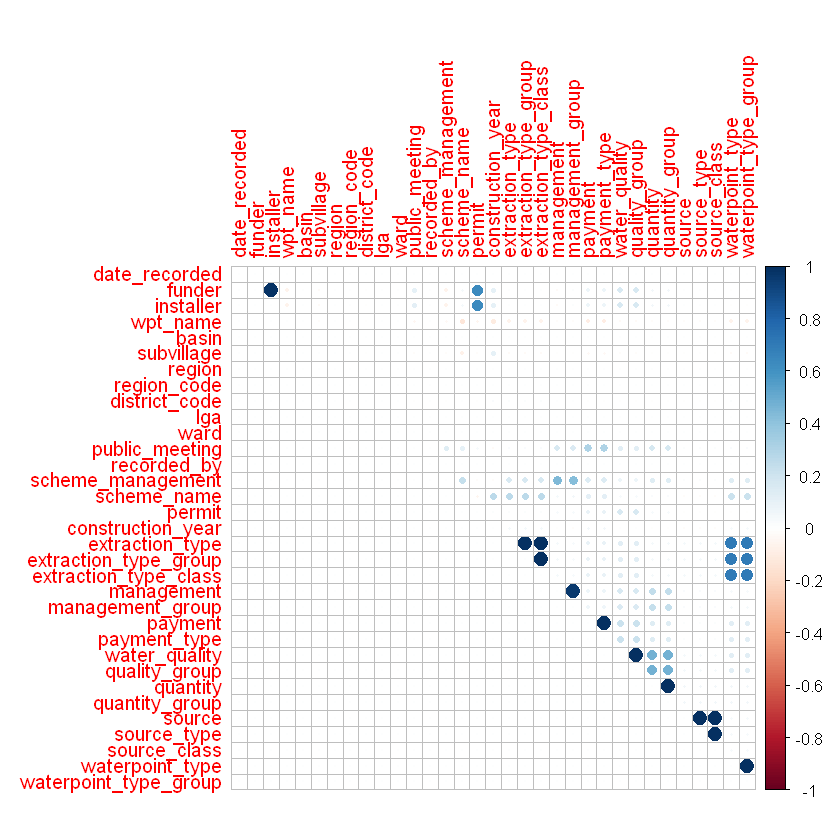

In [43]:
corelated_cat <- cor(sapply(missing_categorical_data_count[,categorical_variables],as.numeric))
corelated_cat[ is.na(corelated_cat)| lower.tri(corelated_cat, diag = TRUE)] <- 0
corrplot(corelated_cat)

Before we think of strategies to deal with missing values, we should first clean up our number of categories. Some categories provide no useful information or at best redundant information. For example, `region` and `region_code` provide the same information. We can vizualize this by plotting the correlation matrix of the values themselves.

Warning message in cor(sapply(processed_data[, categorical_variables], as.numeric)):
"l'écart type est nulle"

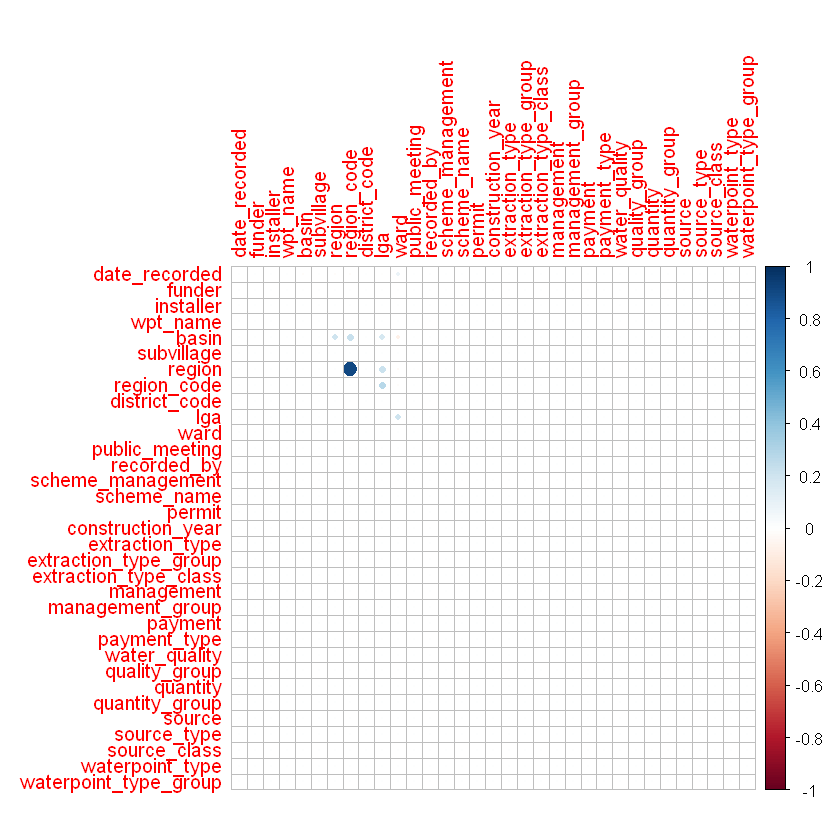

In [44]:
corelated_cat <- cor(sapply(processed_data[,categorical_variables],as.numeric))
corelated_cat[is.na(corelated_cat)| lower.tri(corelated_cat, diag = TRUE)] <- 0
corrplot(corelated_cat)

#### `funder ` and `installer `
Both those categories contain too much unique values and are very badly formated, they contain a lot of duplicated values written differently so we will chose to remove them.

In [45]:
length(unique(processed_data$funder))
length(unique(processed_data$installer))
unique(processed_data$funder)
unique(processed_data$installer)

[1] 1894

[1] 2142

[1] Roman                          Grumeti                       
   [3] Lottery Club                   Unicef                        
   [5] Action In A                    Mkinga Distric Coun           
   [7] Dwsp                           Rwssp                         
   [9] Wateraid                       Isingiro Ho                   
  [11] Private                        Danida                        
  [13] World Vision                   Lawatefuka Water Supply       
  [15] Biore                          Rudep                         
  [17] Hesawa                         Twe                           
  [19] Isf                            African Development Bank      
  [21] Government Of Tanzania         Sobodo                        
  [23] Water                          Private Individual            
  [25] Undp                           <NA>                          
  [27] Kirde                          Cefa                          
  [29] Ces(gmbh)                      European Union                
  [31] Lga                            District Council              
  [33] Muwsa                          Dwe/norad                     
  [35] Kkkt_makwale                   Sawaka                        
  [37] Ces (gmbh)                     Olgilai Village Community     
  [39] Kkkt                           Roman Catholic                
  [41] Norad                          Adra                          
  [43] Sema                           Piusi                         
  [45] Dwe                            Rc Church                     
  [47] Swisland/ Mount Meru Flowers   Ifad                          
  [49] Swedish                        Idc                           
  [51] He                             Isf/tacare                    
  [53] Jica                           Mzee Sh                       
  [55] Aict                           Tcrs                          
  [57] Kiuma                          Germany Republi               
  [59] Netherlands                    Ruthe                         
  [61] Tulawaka Gold Mine             Nethalan                      
  [63] Tasaf                          Concern World Wide            
  [65] Wfp                            Lips                          
  [67] Sida                           World Bank                    
  [69] Tanza                          Sw                            
  [71] Shipo                          Fini Water                    
  [73] Kanisa                         Oxfarm                        
  [75] Village Council                Hesawz                        
  [77] Shanta                         Fpct                          
  [79] Wvt                            Dhv                           
  [81] Ir                             Oikos E.Afrika                
  [83] Anglican Church                Peters                        
  [85] Donor                          Secondary Schoo               
  [87] Amref                          Ministry Of Water             
  [89] Adb                            Jbg                           
  [91] Dadis                          International Aid Services    
  [93] Germany                        Kibaha Town Council           
  [95] Dsdp                           Dfid                          
  [97] Rural Water Supply And Sanitat Af                            
  [99] Wananchi                       Fw                            
 [101] No                             Dct                           
 [103] Africare                       Norad /government             
 [105] British Colonial Government    Co                            
 [107] Ridep                          Tassaf                        
 [109] Hans                           Socie                         
 [111] Finw                           Fin Water                     
 [113] Oxfam                          Plan International            
 [115] African Muslim Agency          Go                            
 

[1] Roman                          GRUMETI                       
   [3] World vision                   UNICEF                        
   [5] Artisan                        DWE                           
   [7] DWSP                           Water Aid                     
   [9] Private                        DANIDA                        
  [11] Lawatefuka water sup           WEDECO                        
  [13] Danid                          TWE                           
  [15] ISF                            Kilolo Star                   
  [17] District council               Water                         
  [19] WU                             <NA>                          
  [21] Not known                      Central government            
  [23] CEFA                           Commu                         
  [25] Accra                          World Vision                  
  [27] LGA                            MUWSA                         
  [29] KKKT _ Konde and DWE           Government                    
  [31] Olgilai village community      KKKT                          
  [33] RWE                            Adra /Community               
  [35] SEMA                           SHIPO                         
  [37] HESAWA                         ACRA                          
  [39] Community                      IFAD                          
  [41] Sengerema Water Department     HE                            
  [43] ISF and TACARE                 Kokeni                        
  [45] DA                             Adra                          
  [47] ALLYS                          AICT                          
  [49] KIUMA                          CES                           
  [51] District Counci                Ruthe                         
  [53] Adra/Community                 Tulawaka Gold Mine            
  [55] KKT C                          Hesawa                        
  [57] Water board                    LOCAL CONTRACT                
  [59] WFP                            LIPS                          
  [61] TASAF                          World                         
  [63] SW                             Shipo                         
  [65] Fini water                     Kanisa                        
  [67] OXFARM                         VILLAGE COUNCIL Orpha         
  [69] Villagers                      Idara ya maji                 
  [71] FPCT                           WVT                           
  [73] Ir                             DANID                         
  [75] Angli                          secondary school              
  [77] Amref                          JBG                           
  [79] DADIS                          International Aid Services    
  [81] RW                             Dmdd                          
  [83] TCRS                           RC Church                     
  [85] WATER AID                      JICA                          
  [87] Gwasco L                       AF                            
  [89] AMREF                          wananchi                      
  [91] FW                             Central Government            
  [93] MWE &                          Gove                          
  [95] RC CHURCH                      TDFT                          
  [97] RWE/DWE                        Central govt                  
  [99] World Bank                     TWESA                         
 [101] Norad                          Hans                          
 [103] FinW                           FIN WATER                     
 [105] OXFAM                          Plan Internationa             
 [107] District Council               RWEDWE                        
 [109] Fini Water                     ANGLI                         
 [111] CDT                            North                         
 [113] Oikos E .Africa                SHAWASA                       
 [115] UN                             NORAD                         
 

#### `scheme_management `,`scheme_name `,`management `,`management_group `

In [46]:
unique(processed_data$scheme_management)
unique(processed_data$management)
unique(processed_data$management_group)
unique(processed_data$scheme_name)


[1] VWC              <NA>             Private operator WUG             
 [5] Water Board      WUA              Water authority  Company         
 [9] Parastatal       Trust            SWC             
10 Levels: VWC Private operator WUG Water Board WUA Water authority ... SWC

[1] vwc              wug              <NA>             private operator
 [5] water board      wua              company          water authority 
 [9] parastatal       other - school   trust           
10 Levels: vwc wug private operator water board wua company ... trust

[1] user-group <NA>       commercial parastatal
Levels: user-group commercial parastatal

[1] Roman                                         
   [2] <NA>                                          
   [3] Nyumba ya mungu pipe scheme                   
   [4] Zingibali                                     
   [5] BL Bondeni                                    
   [6] wanging'ombe water supply s                   
   [7] Makanj                                        
   [8] Kidabu                                        
   [9] Mashangwi                                     
  [10] Quick wins Program                            
  [11] Komaka mandaka                                
  [12] Sobodo Borehole Scheme                        
  [13] Kitukuni water supply                         
  [14] BL Mwakikoti                                  
  [15] Chalinze wate                                 
  [16] Mae pipeline                                  
  [17] UNDP                                          
  [18] Ngana water supplied scheme                   
  [19] Itun                                          
  [20] Bomala                                        
  [21] Kirua kahe pumping water trust                
  [22] Misiwa                                        
  [23] Mtwango water supplied sche                   
  [24] K                                             
  [25] Machumba estate pipe line                     
  [26] SHIMASA                                       
  [27] wangama water supply scheme                   
  [28] Shirimatunda Water Supply                     
  [29] Laela group water Supp                        
  [30] Makwale water supplied sche                   
  [31] Nyang'hwale                                   
  [32] Njoro Water Supply                            
  [33] Kirua kahe gravity water supply trust         
  [34] Olgilai pipe line                             
  [35] Mabula mountains spr                          
  [36] Mkongoro One                                  
  [37] Maambreni gravity water supply                
  [38] Mwando water supply                           
  [39] M                                             
  [40] Kaisho/Isingiro w                             
  [41] wanging'ombe supply scheme                    
  [42] Tove Mtwango gravity Scheme                   
  [43] Tengeru gravity water supply                  
  [44] Kulasi water supply                           
  [45] Malemb                                        
  [46] Tawa                                          
  [47] Loruvani gravity water supply                 
  [48] HESAWA                                        
  [49] B                                             
  [50] Gawa                                          
  [51] Chankele/Bubango water project                
  [52] Bagamoyo wate                                 
  [53] Kijiji                                        
  [54] Donge                                         
  [55] Mradi wa maji wa mpitimbi                     
  [56] Mwang'hosha Nyamalogo                         
  [57] Shallow well                                  
  [58] Mbati Water Supply                            
  [59] Losaa-Kia water supply                        
  [60] Kwa Nyange water supply                       
  [61] Kiwele                                        
  [62] N                                             
  [63] Tuvaila gravity water supply                  
  [64] Bumi                                          
  [65] Kan                                           
  [66] TASAF                                         
  [67] Ihela                                         
  [68] Kabindi Water Supply                          
  [69] Shagai streem                                 
  [70] Distri                                        
  [71] LIPS Borehole Scheme                          
  [72] Kanga water supplied scheme                   
  [73] Mkam                                          
  [74] Vugiro                                        
  [75] 

From those 4 categories we will keep `management`. `scheme_name ` has too many missing values and too many different unique values to be used efficiently for classification, `scheme_management` and `management_group` offers the same information as `management` but has more missing values.

#### `extraction_type `,`extraction_type_group ` and `extraction_type_class`

In [47]:
unique(processed_data$extraction_type)
unique(processed_data$extraction_type_group)
unique(processed_data$extraction_type_class)

[1] gravity                   submersible              
 [3] swn 80                    nira/tanira              
 [5] india mark ii             <NA>                     
 [7] ksb                       mono                     
 [9] windmill                  afridev                  
[11] other - rope pump         india mark iii           
[13] other - swn 81            other - play pump        
[15] cemo                      climax                   
[17] walimi                    other - mkulima/shinyanga
17 Levels: gravity submersible swn 80 nira/tanira india mark ii ksb ... other - mkulima/shinyanga

[1] gravity         submersible     swn 80          nira/tanira    
 [5] india mark ii   <NA>            mono            wind-powered   
 [9] afridev         rope pump       india mark iii  other handpump 
[13] other motorpump
12 Levels: gravity submersible swn 80 nira/tanira india mark ii ... other motorpump

[1] gravity      submersible  handpump     <NA>         motorpump   
[6] wind-powered rope pump   
Levels: gravity submersible handpump motorpump wind-powered rope pump

`extraction_type_group` will be removed.

We will apply the same pattern to the rest of the categories.

In [48]:
unique(processed_data$payment) # removed
unique(processed_data$payment_type) 

unique(processed_data$water_quality)
unique(processed_data$quality_group) # removed

unique(processed_data$quantity) 
unique(processed_data$quantity_group) # removed

unique(processed_data$source) 
unique(processed_data$source_type) # removed
unique(processed_data$source_class) # removed

unique(processed_data$waterpoint_type)
unique(processed_data$waterpoint_type_group) # removed

[1] pay annually          never pay             pay per bucket       
[4] <NA>                  pay when scheme fails pay monthly          
5 Levels: pay annually never pay pay per bucket ... pay monthly

[1] annually   never pay  per bucket <NA>       on failure monthly   
Levels: annually never pay per bucket on failure monthly

[1] soft               salty              milky              <NA>              
[5] fluoride           coloured           salty abandoned    fluoride abandoned
7 Levels: soft salty milky fluoride coloured ... fluoride abandoned

[1] good     salty    milky    <NA>     fluoride colored 
Levels: good salty milky fluoride colored

[1] enough       insufficient dry          seasonal     <NA>        
Levels: enough insufficient dry seasonal

[1] enough       insufficient dry          seasonal     <NA>        
Levels: enough insufficient dry seasonal

[1] spring               rainwater harvesting dam                 
[4] machine dbh          <NA>                 shallow well        
[7] river                hand dtw             lake                
8 Levels: spring rainwater harvesting dam machine dbh shallow well ... lake

[1] spring               rainwater harvesting dam                 
[4] borehole             <NA>                 shallow well        
[7] river/lake          
Levels: spring rainwater harvesting dam borehole shallow well river/lake

[1] groundwater surface     <NA>       
Levels: groundwater surface

[1] communal standpipe          communal standpipe multiple
[3] hand pump                   <NA>                       
[5] improved spring             cattle trough              
[7] dam                        
6 Levels: communal standpipe communal standpipe multiple ... dam

[1] communal standpipe hand pump          <NA>               improved spring   
[5] cattle trough      dam               
Levels: communal standpipe hand pump improved spring cattle trough dam

In [49]:
categorical_variables
sapply(sapply(processed_data[,categorical_variables],unique),length)

date_recorded                funder             installer 
                    3                     4                     6 
             wpt_name                 basin            subvillage 
                    9                    11                    12 
               region           region_code         district_code 
                   13                    14                    15 
                  lga                  ward        public_meeting 
                   16                    17                    19 
          recorded_by     scheme_management           scheme_name 
                   20                    21                    22 
               permit     construction_year       extraction_type 
                   23                    24                    25 
extraction_type_group extraction_type_class            management 
                   26                    27                    28 
     management_group               payment          payment_type 
                   29                    30                    31 
        water_quality         quality_group              quantity 
                   32                    33                    34 
       quantity_group                source           source_type 
                   35                    36                    37 
         source_class       waterpoint_type waterpoint_type_group 
                   38                    39                    40

date_recorded                funder             installer 
                  356                  1894                  2142 
             wpt_name                 basin            subvillage 
                37397                     9                 19287 
               region           region_code         district_code 
                   21                    27                    20 
                  lga                  ward        public_meeting 
                  125                  2092                     3 
          recorded_by     scheme_management           scheme_name 
                    1                    11                  2695 
               permit     construction_year       extraction_type 
                    3                    55                    18 
extraction_type_group extraction_type_class            management 
                   13                     7                    11 
     management_group               payment          payment_type 
                    4                     6                     6 
        water_quality         quality_group              quantity 
                    8                     6                     5 
       quantity_group                source           source_type 
                    5                     9                     7 
         source_class       waterpoint_type waterpoint_type_group 
                    3                     7                     6

In [50]:
filtered_categorical_variables = c("date_recorded","basin","region","district_code","public_meeting",
                                   "management","permit","construction_year","extraction_type_group",
                                   "payment_type","water_quality","quantity","source","waterpoint_type")
filtered_numerical_variables = c("id","amount_tsh","gps_height","longitude","latitude","num_private","population")

filtered_variables = c(filtered_numerical_variables,filtered_categorical_variables)
filtered_data <- processed_data[,filtered_variables]
status_group = l_data$status_group
filtered_data <- cbind(filtered_data,status_group)


#### Missing value replacement 

We are now ready to perform missing value imputation for our remaining categorical variables.

In [51]:
summary(missing_categorical_data_count[,filtered_categorical_variables])

 date_recorded       basin           region      district_code  
 Known  :59400   Known  :59400   Known  :59400   Known  :59377  
 Missing:    0   Missing:    0   Missing:    0   Missing:   23  
 public_meeting    management        permit      construction_year
 Known  :56066   Known  :57995   Known  :56344   Known  :38691    
 Missing: 3334   Missing: 1405   Missing: 3056   Missing:20709    
 extraction_type_group  payment_type   water_quality      quantity    
 Known  :52970         Known  :50189   Known  :57524   Known  :58611  
 Missing: 6430         Missing: 9211   Missing: 1876   Missing:  789  
     source      waterpoint_type
 Known  :59122   Known  :53020  
 Missing:  278   Missing: 6380  

Missing values values for the following categories : district_code, public_meeting, management, permit, construction_year, extraction_type_group, payment_type, water_quality, quantity, source and waterpoint_type will be replaced by the most common values found in the data for that category.

In [69]:
missing_values_categories <- c("district_code", "public_meeting", "management", "permit", "construction_year", "extraction_type_group", "payment_type", "water_quality", "quantity", "source" , "waterpoint_type")

Mode <- function(x) {
   ux <- unique(x[!is.na(x)])
  ux[which.max(tabulate(match(x, ux)))]
 }

for (column in missing_values_categories){
    filtered_data[,column][is.na(filtered_data[,column])] <- Mode(filtered_data[,column])
  
}
filtered_data

id,amount_tsh,gps_height,longitude,latitude,num_private,population,date_recorded,basin,region,...,management,permit,construction_year,extraction_type_group,payment_type,water_quality,quantity,source,waterpoint_type,status_group
69572,6000,1390,34.93809,-9.856322,0,109,2011-03-14,Lake Nyasa,Iringa,...,vwc,False,1999,gravity,annually,soft,enough,spring,communal standpipe,functional
8776,0,1399,34.69877,-2.147466,0,280,2013-03-06,Lake Victoria,Mara,...,wug,True,2010,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
34310,25,686,37.46066,-3.821329,0,250,2013-02-25,Pangani,Manyara,...,vwc,True,2009,gravity,per bucket,soft,enough,dam,communal standpipe multiple,functional
67743,0,263,38.48616,-11.155298,0,58,2013-01-28,Ruvuma / Southern Coast,Mtwara,...,vwc,True,1986,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
19728,0,0,31.13085,-1.825359,0,0,2011-07-13,Lake Victoria,Kagera,...,vwc,True,2010,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional
9944,20,0,39.17280,-4.765587,0,1,2011-03-13,Pangani,Tanga,...,vwc,True,2009,submersible,per bucket,salty,enough,spring,communal standpipe multiple,functional
19816,0,0,33.36241,-3.766365,0,0,2012-10-01,Internal,Shinyanga,...,vwc,True,2010,swn 80,never pay,soft,enough,machine dbh,hand pump,non functional
54551,0,0,32.62062,-4.226198,0,0,2012-10-09,Lake Tanganyika,Shinyanga,...,wug,True,2010,nira/tanira,never pay,milky,enough,shallow well,hand pump,non functional
53934,0,0,32.71110,-5.146712,0,0,2012-11-03,Lake Tanganyika,Tabora,...,vwc,True,2010,india mark ii,never pay,salty,seasonal,machine dbh,hand pump,non functional
46144,0,0,30.62699,-1.257051,0,0,2011-08-03,Lake Victoria,Kagera,...,vwc,True,2010,nira/tanira,never pay,soft,enough,shallow well,hand pump,functional


In [70]:
write.csv(filtered_data,"filtered_data.csv", row.names = FALSE,quote = FALSE,na="0")

## 1.3 Feature engineering <a class="anchor" id="4-bullet"></a>

### Converting dates and years to numerical values <a class="anchor" id="4-bullet"></a>

Another improvement we could make, is change the categories `date_recorded` and `construction_year` to more quantitative values, such as weeks/days since recorded and years since construction.


In [71]:
filtered_data <- read.csv("filtered_data.csv")

filtered_data$date_recorded <- as.numeric(as.Date(as.character("2021-05-12"), format="%Y-%m-%d") - as.Date(as.character(filtered_data$date_recorded), format="%Y-%m-%d"))
filtered_data$construction_year<-as.numeric(as.Date(as.character("2021"), format="%Y") - as.Date(as.character(filtered_data$construction_year), format="%Y"))%/%365

filtered_test_set <- read.csv("test_set_values.csv")

filtered_test_set$date_recorded <- as.numeric(as.Date(as.character("2021-05-12"), format="%Y-%m-%d") - as.Date(as.character(filtered_test_set$date_recorded), format="%Y-%m-%d"))
filtered_test_set$construction_year<-as.numeric(as.Date(as.character("2021"), format="%Y") - as.Date(as.character(filtered_test_set$construction_year), format="%Y"))%/%365



In [72]:
write.csv(filtered_data,"filtered_data.csv", row.names = FALSE,quote = FALSE)
write.csv(filtered_test_set,"filtered_test_set.csv", row.names = FALSE,quote = FALSE)

In [73]:
filtered_data

id,amount_tsh,gps_height,longitude,latitude,num_private,population,date_recorded,basin,region,...,management,permit,construction_year,extraction_type_group,payment_type,water_quality,quantity,source,waterpoint_type,status_group
69572,6000,1390,34.93809,-9.856322,0,109,3712,Lake Nyasa,Iringa,...,vwc,False,22,gravity,annually,soft,enough,spring,communal standpipe,functional
8776,0,1399,34.69877,-2.147466,0,280,2989,Lake Victoria,Mara,...,wug,True,11,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
34310,25,686,37.46066,-3.821329,0,250,2998,Pangani,Manyara,...,vwc,True,12,gravity,per bucket,soft,enough,dam,communal standpipe multiple,functional
67743,0,263,38.48616,-11.155298,0,58,3026,Ruvuma / Southern Coast,Mtwara,...,vwc,True,35,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
19728,0,0,31.13085,-1.825359,0,0,3591,Lake Victoria,Kagera,...,vwc,True,11,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional
9944,20,0,39.17280,-4.765587,0,1,3713,Pangani,Tanga,...,vwc,True,12,submersible,per bucket,salty,enough,spring,communal standpipe multiple,functional
19816,0,0,33.36241,-3.766365,0,0,3145,Internal,Shinyanga,...,vwc,True,11,swn 80,never pay,soft,enough,machine dbh,hand pump,non functional
54551,0,0,32.62062,-4.226198,0,0,3137,Lake Tanganyika,Shinyanga,...,wug,True,11,nira/tanira,never pay,milky,enough,shallow well,hand pump,non functional
53934,0,0,32.71110,-5.146712,0,0,3112,Lake Tanganyika,Tabora,...,vwc,True,11,india mark ii,never pay,salty,seasonal,machine dbh,hand pump,non functional
46144,0,0,30.62699,-1.257051,0,0,3570,Lake Victoria,Kagera,...,vwc,True,11,nira/tanira,never pay,soft,enough,shallow well,hand pump,functional


## 1.4 Conversion to numeric encoding and normalization of the data <a class="anchor" id="5-bullet"></a>

In order to process our data with some algorithms, we need to convert our data to numerical encoding, this means that if we have a category containing values {apple,orange,banana}, they will be converted to {1,2,3}. A normalized version will also be created, for the previous example it would give us {apple,orange,banana} -> {0,0.5,1}.

In [74]:
normalize <-function(x) { 
    (x -min(x))/(max(x)-min(x))
}

In [75]:
training_set <- read.csv("filtered_data.csv")
test_set <- read.csv("filtered_test_set.csv")

categorical_variables = c("basin","region","district_code","public_meeting",
                                   "management","permit","extraction_type_group",
                                   "payment_type","water_quality","quantity","source","waterpoint_type")



numerical_variables = c("date_recorded","construction_year","amount_tsh","gps_height","longitude","latitude","num_private","population")


In [76]:
variables = c(numerical_variables,categorical_variables)
variables_with_label = c(variables,"status_group")

training_set_formated <- training_set[,][,variables]

training_set_formated <- training_set[,][,variables_with_label]

for (column in categorical_variables){
    
    levels_f = unique(training_set_formated[,column])        
    training_set_formated[,column] <- factor(training_set_formated[,column],levels =levels_f)
    
}
training_set_formated[,variables_with_label]<- sapply(training_set_formated[,variables_with_label],as.numeric)

normalized_training_set <- training_set_formated
normalized_training_set[,variables_with_label] <- as.data.frame(lapply(training_set_formated[,variables_with_label], normalize))


In [77]:
training_set_formated

write.csv(training_set_formated,"numerical_training_set.csv", row.names = FALSE,quote=FALSE)

date_recorded,construction_year,amount_tsh,gps_height,longitude,latitude,num_private,population,basin,region,...,public_meeting,management,permit,extraction_type_group,payment_type,water_quality,quantity,source,waterpoint_type,status_group
3712,22,6000,1390,34.93809,-9.856322,0,109,1,1,...,1,1,1,1,1,1,1,1,1,1
2989,11,0,1399,34.69877,-2.147466,0,280,2,2,...,1,2,2,1,2,1,2,2,1,1
2998,12,25,686,37.46066,-3.821329,0,250,3,3,...,1,1,2,1,3,1,1,3,2,1
3026,35,0,263,38.48616,-11.155298,0,58,4,4,...,1,1,2,2,2,1,3,4,2,3
3591,11,0,0,31.13085,-1.825359,0,0,2,5,...,1,1,2,1,2,1,4,2,1,1
3713,12,20,0,39.17280,-4.765587,0,1,3,6,...,1,1,2,2,3,2,1,1,2,1
3145,11,0,0,33.36241,-3.766365,0,0,5,7,...,1,1,2,3,2,1,1,4,3,3
3137,11,0,0,32.62062,-4.226198,0,0,6,7,...,1,2,2,4,2,3,1,5,3,3
3112,11,0,0,32.71110,-5.146712,0,0,6,8,...,1,1,2,5,2,2,4,4,3,3
3570,11,0,0,30.62699,-1.257051,0,0,2,5,...,1,1,2,4,2,1,1,5,3,1


In [78]:
normalized_training_set

write.csv(normalized_training_set,"norm_training_set.csv", row.names = FALSE,quote=FALSE)

date_recorded,construction_year,amount_tsh,gps_height,longitude,latitude,num_private,population,basin,region,...,public_meeting,management,permit,extraction_type_group,payment_type,water_quality,quantity,source,waterpoint_type,status_group
0.244591937,0.26415094,1.714286e-02,0.51748252,0.49645516,0.1683525,0,3.573770e-03,0.000,0.00,...,0,0.0000000,0,0.00000000,0.00,0.0000000,0.0000000,0.0000000,0.0,0.0
0.066863324,0.05660377,0.000000e+00,0.52062937,0.47416748,0.8921224,0,9.180328e-03,0.125,0.05,...,0,0.1111111,1,0.00000000,0.25,0.0000000,0.3333333,0.1428571,0.0,0.0
0.069075713,0.07547170,7.142857e-05,0.27132867,0.73137367,0.7349666,0,8.196721e-03,0.250,0.10,...,0,0.0000000,1,0.00000000,0.50,0.0000000,0.0000000,0.2857143,0.2,0.0
0.075958702,0.50943396,0.000000e+00,0.12342657,0.82687466,0.0463941,0,1.901639e-03,0.375,0.15,...,0,0.0000000,1,0.09090909,0.25,0.0000000,0.6666667,0.4285714,0.2,1.0
0.214847591,0.05660377,0.000000e+00,0.03146853,0.14189930,0.9223644,0,0.000000e+00,0.125,0.20,...,0,0.0000000,1,0.00000000,0.25,0.0000000,1.0000000,0.1428571,0.0,0.0
0.244837758,0.07547170,5.714286e-05,0.03146853,0.89081862,0.6463119,0,3.278689e-05,0.250,0.25,...,0,0.0000000,1,0.09090909,0.50,0.1666667,0.0000000,0.0000000,0.2,0.0
0.105211406,0.05660377,0.000000e+00,0.03146853,0.34971718,0.7401271,0,0.000000e+00,0.500,0.30,...,0,0.0000000,1,0.18181818,0.25,0.0000000,0.0000000,0.4285714,0.4,1.0
0.103244838,0.05660377,0.000000e+00,0.03146853,0.28063654,0.6969542,0,0.000000e+00,0.625,0.30,...,0,0.1111111,1,0.27272727,0.25,0.3333333,0.0000000,0.5714286,0.4,1.0
0.097099312,0.05660377,0.000000e+00,0.03146853,0.28906291,0.6105289,0,0.000000e+00,0.625,0.35,...,0,0.0000000,1,0.36363636,0.25,0.1666667,1.0000000,0.4285714,0.4,1.0
0.209685349,0.05660377,0.000000e+00,0.03146853,0.09497689,0.9757218,0,0.000000e+00,0.125,0.20,...,0,0.0000000,1,0.27272727,0.25,0.0000000,0.0000000,0.5714286,0.4,0.0


## 1.5 Feature selection <a class="anchor" id="6-bullet"></a>

Now that we pre-processed our data and performed a first pass "hand" filter, we can run a more formal feature selection process for the ones remaining. We will implement in this section a mRMR filter and create a list of set of features of different sizes. For each size, going from N to 5 (N being the total number of features), we will select the best ranked features by the filter.

### mRMR filter

In [79]:
training_set <- read.csv("norm_training_set.csv")
n <- ncol(training_set)
n_var <- n-1
training_set_vars <- training_set[,1:n_var]
training_set_out <- training_set[,n]
correlation<-abs(cor(training_set_vars,training_set_out))
feature_set <- vector("list", length(n_var))
selected<-c()
candidates<-1:n_var

for (j in 1:n_var) {
    redundancy_score<-numeric(length(candidates))
        
    if (length(selected)>0) {
        cor_selected_candidates<-cor(training_set_vars[,selected,drop=F],training_set_vars[,candidates,drop=F])
        redundancy_score<-apply(cor_selected_candidates,2,mean)
    }
        
    # mRMR: minimum Redundancy Maximum Relevancy
    mRMR_score<-correlation[candidates]-redundancy_score
        
    selected_current<-candidates[which.max(mRMR_score)]
    selected<-c(selected,selected_current)
        
    candidates<-setdiff(candidates,selected_current)
    
    feature_set[[j]] <- selected
}

selected

[1] 18  4 19 16 11  2 20 13  1  6 10 12  3 14 17  5 15  7  8  9

We now have the list of our features sorted from most "desirable" to less desirable, we can now implement learning procedures using subsets of those features and compute their error.

# 2. Model selection procedure <a class="anchor" id="7-bullet"></a>

## Flowchart

![Flowchart for model selection](flow.png)

## 2.1 Sampling training and test sets for cross validation <a class="anchor" id="8-bullet"></a>

We partition the training set in 10 randomly sampled parts, we will use 10-fold cross validation, so at each step, 9 parts will be used for training and 1 part will be used for validation. 

But before doing that we need to make sure that 10-fold-cross validation is actually here a good measure of performance for our models. Even though the folds are randomly sampled uniformly, for imbalanced datasets where one class is more or less present than the other, the distribution of a fold can be skewed towards a class and thus not represent correctly the whole dataset. So we will first check how our folds are distributed.


             functional functional needs repair          non functional 
                  32259                    4317                   22824 

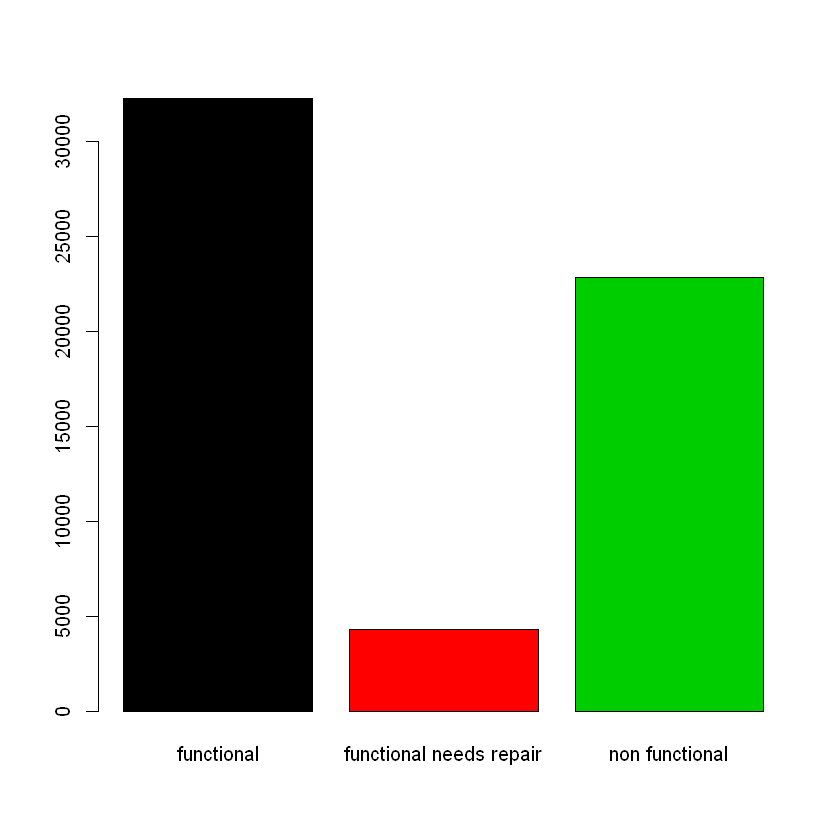

In [80]:
features <- selected
data <- read.csv("norm_training_set.csv")
numeric_data <- read.csv("numerical_training_set.csv")
data_labels <- read.csv("training_set_labels.csv")


index <- 1:59400
fold_index <- 1:10
folds <- split(sample(index),1:10)
features <- selected

table(data_labels$status_group)
plot(data_labels$status_group,col = rep(1:3))

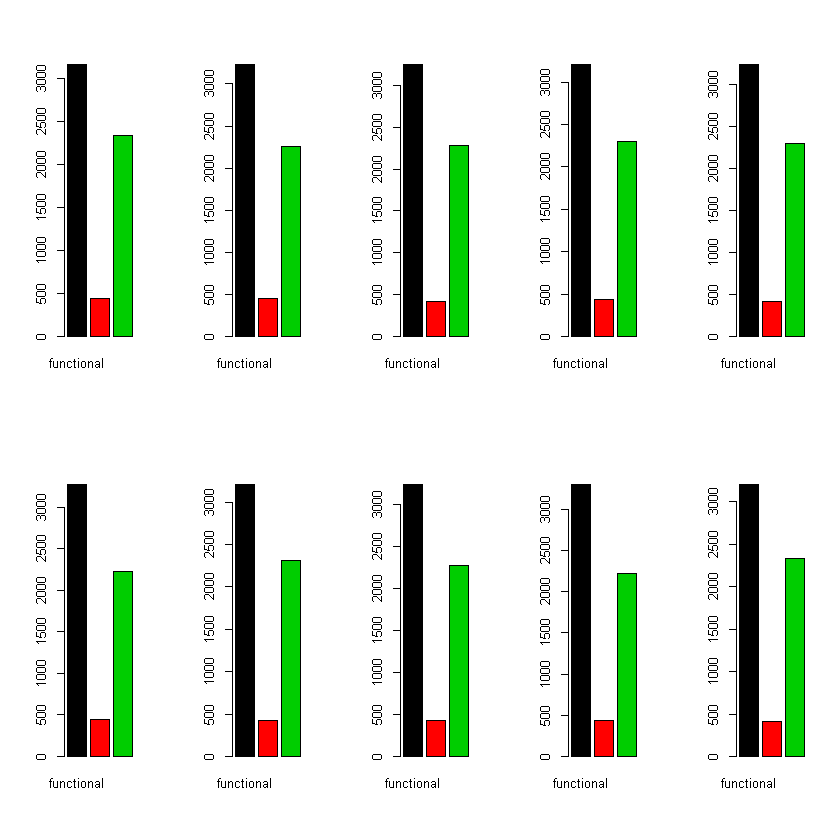

In [81]:
par(mfrow=c(2,5))
for (i in 1:10){
    plot(data_labels[folds[[i]],"status_group"],col = rep(1:3))
}


We can see from these graphs that the distribution is maintainted in our folds, we can then safely assume that 10-fold cross validation will be a good measure of performance for our classifiers.

## 2.2 Learning methods <a class="anchor" id="9-bullet"></a>

### 2.2.1 Lazy (nearest neighbours) <a class="anchor" id="10-bullet"></a>
Nearest neighbors or more precisely here k-nearest neighbors can be used either for regression or classification, in our case we are more intrested by the classification variant. This method uses euclidian distance between variables to return a set of neighbors of a point such that the total distance is minimized, the most common class in that set of neighbors will be used to classify the desired point.

In [82]:
# Example of usage with k=10 neighbors
ts_index <- folds[[10]]
tr_index <- setdiff(index,ts_index)
cl <- data_labels[tr_index,"status_group"]
ts_solution <- data_labels[ts_index,"status_group"]
tr <- data[tr_index,features]
ts <- data[ts_index,features]
res <- knn(tr, ts, cl, k = 10,prob=TRUE)
atr <- attributes(.Last.value)
length(which(ts_solution == res))/length(ts_solution) #classification rate

[1] 0.7649832

In [83]:
atr

$levels
[1] "functional"              "functional needs repair"
[3] "non functional"         

$class
[1] "factor"

$prob
   [1] 1.0000000 0.8000000 0.6000000 0.6000000 0.6000000 0.4375000 1.0000000
   [8] 1.0000000 0.7000000 0.7000000 1.0000000 0.9000000 1.0000000 0.8000000
  [15] 0.9000000 1.0000000 1.0000000 0.6000000 0.8000000 0.6000000 0.8000000
  [22] 0.7000000 0.9000000 0.8000000 0.4000000 1.0000000 1.0000000 0.8000000
  [29] 0.6000000 0.5000000 0.9000000 0.5000000 0.7000000 0.8000000 0.5000000
  [36] 1.0000000 1.0000000 0.5333333 0.9000000 0.8000000 0.5833333 0.6000000
  [43] 0.8000000 1.0000000 0.8000000 0.9000000 0.8000000 1.0000000 0.5000000
  [50] 0.8000000 1.0000000 0.7000000 0.8000000 0.8000000 0.5000000 0.6000000
  [57] 0.6000000 0.8000000 0.7000000 0.9000000 0.6000000 1.0000000 1.0000000
  [64] 1.0000000 1.0000000 0.8000000 0.7000000 0.8000000 0.8000000 1.0000000
  [71] 0.7000000 0.9000000 0.8000000 0.5000000 1.0000000 0.7000000 0.9000000
  [78] 0.8000000 0.6000000 0.7000000 0.7272727 0.9000000 1.0000000 0.6000000
  [85] 0.9000000 1.0000000 0.8000000 1.0000000 1.0000000 0.6000000 0.8000000
  [92] 0.6000000 0.7000000 0.5000000 1.0000000 0.8000000 0.8000000 1.0000000
  [99] 0.6000000 0.8000000 0.8000000 0.5000000 1.0000000 0.7000000 1.0000000
 [106] 1.0000000 0.5000000 0.8000000 0.6000000 0.9000000 0.5714286 0.4000000
 [113] 1.0000000 0.5000000 1.0000000 0.8000000 0.5454545 1.0000000 0.5000000
 [120] 0.9000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [127] 0.7000000 0.6000000 0.8000000 0.8000000 0.8000000 0.5000000 0.4000000
 [134] 0.5000000 0.6000000 0.6000000 0.9000000 0.6000000 0.9000000 1.0000000
 [141] 0.9000000 0.7000000 0.8000000 1.0000000 0.8000000 1.0000000 0.7000000
 [148] 0.8181818 0.5000000 1.0000000 1.0000000 0.9000000 0.8000000 0.8000000
 [155] 1.0000000 0.7000000 1.0000000 0.6000000 0.9000000 0.6000000 0.9000000
 [162] 0.8000000 0.5000000 0.9000000 0.4210526 0.7000000 1.0000000 0.6000000
 [169] 1.0000000 0.5454545 0.8666667 0.5000000 1.0000000 0.6000000 0.9000000
 [176] 1.0000000 0.5000000 0.9000000 1.0000000 1.0000000 0.9000000 1.0000000
 [183] 0.9000000 0.6363636 1.0000000 0.5000000 0.5000000 1.0000000 0.7000000
 [190] 0.9000000 1.0000000 0.8000000 1.0000000 0.6000000 0.9000000 0.8055556
 [197] 1.0000000 0.7000000 0.9000000 0.7000000 0.6000000 0.9000000 0.6000000
 [204] 0.9000000 1.0000000 0.9000000 0.7000000 0.4000000 0.9000000 1.0000000
 [211] 0.7000000 0.6000000 0.6000000 0.5000000 0.7000000 0.8000000 1.0000000
 [218] 0.5000000 0.9000000 1.0000000 1.0000000 1.0000000 0.9000000 0.7000000
 [225] 1.0000000 0.8000000 0.9000000 0.8000000 0.5000000 1.0000000 0.5000000
 [232] 0.7000000 0.9000000 0.8000000 1.0000000 1.0000000 0.6000000 0.8000000
 [239] 0.8000000 0.7000000 0.9000000 1.0000000 1.0000000 0.5000000 0.7000000
 [246] 1.0000000 0.9000000 0.8000000 0.5000000 0.7000000 0.6000000 0.7000000
 [253] 1.0000000 0.6000000 0.5000000 0.7000000 1.0000000 0.7000000 0.8000000
 [260] 0.4000000 0.8000000 0.5000000 0.8000000 0.7000000 1.0000000 0.7000000
 [267] 1.0000000 0.8000000 1.0000000 0.9000000 1.0000000 1.0000000 0.5454545
 [274] 0.7000000 0.9000000 0.7000000 0.6000000 1.0000000 0.9000000 1.0000000
 [281] 0.7000000 0.8000000 1.0000000 0.9000000 0.8000000 0.9166667 0.7000000
 [288] 0.9000000 1.0000000 0.6000000 0.9000000 0.8000000 0.7000000 1.0000000
 [295] 0.8000000 0.9000000 0.9000000 1.0000000 1.0000000 0.8000000 0.7000000
 [302] 0.5000000 0.6000000 0.5000000 0.7000000 0.9000000 0.8000000 1.0000000
 [309] 0.9000000 1.0000000 1.0000000 1.0000000 0.8000000 0.6000000 1.0000000
 [316] 0.7000000 0.6000000 0.4000000 0.7000000 1.0000000 0.5000000 0.8000000
 [323] 1.0000000 0.8000000 0.6000000 0.9000000 0.7000000 1.0000000 0.9000000
 [330] 1.0000000 0.9000000 0.9000000 1.0000000 0.8000000 0.9000000 0.9000000
 [337] 0.8000000 0.6000000 0.9000000 0.9000000 0.7000000 0.9000000 1.0000000
 [344] 0.6000000 0.8000000 0.7000000 0.6000000 0.7000000 0.4000000 0.9000000
 [351] 0.8571429 0.7000000 0

#### Finding a good value for k

Finding a good value for the number of neighbors k is a tricky process, if k is too small, noizy data could impact the error rate too easily and if k is too big, computational time and overfitting could be problematic. 

A good value for k usually used in practice is the squared root of the size of the training set. Here our training sets are subsets of the original training set with 53460 entries for each subset (10 in total), so we could use k = 231 as a reference point. Let's try out different values for k and see how the classification rate and additional computational time changes.

In [84]:
measure_error_rate <- function(k_value){
    error <- 0
    for(i in 1:10){
        ts_i <- folds[[i]]
        tr_i <- setdiff(index,ts_i)
        cl <- data_labels[tr_i,"status_group"]
        ts_sol <- data_labels[ts_i,"status_group"]
        train <- data[tr_i,features]
        test <- data[ts_i,features]
        res <- knn(train, test, cl, k = k_value)
        e <- 1-(length(which(ts_sol == res))/length(ts_sol)) #classification test error
        error <- error + e
    }
    error <- error / 10
}


In [94]:
# takes a long time to run, do not uncomment unless you want to run the tests again

#k_values = c(5,10,20,40,80,120,150,200,231) # takes a long time 
#err <- sapply(k_values,measure_error_rate)
err

[1] 0.2279966 0.2365657 0.2498485 0.2727609 0.2961953 0.3055556 0.3127946
[8] 0.3274579 0.3351178

Interestingly, it seems that increasing the number of neighbors does not help with classification improvement here, in fact it makes it worse. This can be explained by the distribution of the data itself, since more neighbors are considered, classes represented more frequently have more chance to take the majority vote. 

We have to note that tests were made considering all available 20 features, to find a good value for k we maybe need to restrain the number of variables so that we restrain the neighborhood on better ranked features. 

In [85]:
measure_error_rate_restr <- function(k_value){
    error <- 0
    for(i in 1:10){
        ts_i <- folds[[i]]
        tr_i <- setdiff(index,ts_i)
        cl <- data_labels[tr_i,"status_group"]
        ts_sol <- data_labels[ts_i,"status_group"]
        train <- data[tr_i,features[1:10]] #considering only the first 10 features
        test <- data[ts_i,features[1:10]]
        res <- knn(train, test, cl, k = k_value)
        e <- 1-(length(which(ts_sol == res))/length(ts_sol)) #classification test error
        error <- error + e
    }
    error <- error / 10
}


In [97]:
# takes a long time to run, do not uncomment unless you want to run the tests again
#k_values = c(5,10,20,40,80,120,150,200,231) # takes a long time 
#err <- sapply(k_values,measure_error_rate_restr)
err

[1] 0.2280808 0.2324916 0.2418519 0.2579293 0.2766835 0.2925589 0.2977104
[8] 0.3076768 0.3079966

We can see that lowering the number of features helps us improve classification for each k-value, but a higher k-value itself doesn't help with better classification results. We will need to run more tests to determine what a good value for k should be.

#### Computing CV-Error for different feature and different k-values 

In this section, we will calculate how the error varries depending on the number of features we chose to keep and depending on the number of neighbors k. We ranked earlier the 20 remaining features by their mRMR score and will use this rank to decide in which order we keep adding features. 

We will start by keeping a minimum of 5 features and increasing this number until we used the 20 available features. We will then compare how the learning procedure performs in terms of classification error and computing time.

In [86]:

k_opt = c(5,10,20,40,80,120,150,200,231)

measure_error_by_k <- function(k_value){
    knn_results <- read.csv("knn_results.csv")

    range <- 5:20
    for (i in range){
        for(fold in 1:10){
            ts_i <- folds[[fold]]
            tr_i <- setdiff(index,ts_i)
            cl <- data_labels[tr_i,"status_group"]
            ts_sol <- data_labels[ts_i,"status_group"]
            train <- data[tr_i,features[1:i]]
            test <- data[ts_i,features[1:i]]
            res <- knn(train, test, cl, k = k_value)
            
            e <- 1-(length(which(ts_sol == res))/length(ts_sol)) #classification test error
            
            
            new_line <- list(k_value=k_value, fold_number=i, feature_number=i,class_rate=e)

            knn_results <- rbind(knn_results,new_line, stringsAsFactors=FALSE)
            write.csv(knn_results,"knn_results.csv", row.names = FALSE,quote=FALSE)
        }
    }
}


In [87]:
# takes a long time to run, do not uncomment unless you want to run the tests again

#sapply(k_opt,measure_error_by_k)

In [88]:
knn_results <- read.csv("knn_results.csv")

In [89]:
grouped_knn <- knn_results %>%
  group_by(k_value,feature_number) %>%
  summarize(mean_error = mean(class_rate, na.rm = TRUE))


head(grouped_knn %>% arrange(mean_error))


`summarise()` has grouped output by 'k_value'. You can override using the `.groups` argument.


k_value,feature_number,mean_error
5,17,0.2265993
5,18,0.2266330
5,19,0.2269865
5,20,0.2275926
5,11,0.2291246
5,16,0.2295118


It seems that the best performing parameters are k = 5 with the 17 first features used that give us an average classification rate of 77.34% after performing 10-fold cross validation.

###  2.2.2 randomForest (random forest) <a class="anchor" id="11-bullet"></a>

#### Example with default parameters

In [90]:
model <- randomForest(x=numeric_data[tr_index,features],
                          y=as.factor(numeric_data[tr_index,"status_group"]),
                          xtest=numeric_data[ts_index,features],
                          ytest=as.factor(numeric_data[ts_index,"status_group"]))

In [91]:
model


Call:
 randomForest(x = numeric_data[tr_index, features], y = as.factor(numeric_data[tr_index,      "status_group"]), xtest = numeric_data[ts_index, features],      ytest = as.factor(numeric_data[ts_index, "status_group"])) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 18.97%
Confusion matrix:
      1    2     3 class.error
1 26251  551  2259  0.09669316
2  2133 1249   520  0.67990774
3  4404  273 15820  0.22817973
                Test set error rate: 18.84%
Confusion matrix:
     1   2    3 class.error
1 2898  56  244  0.09380863
2  227 141   47  0.66024096
3  497  48 1782  0.23420713

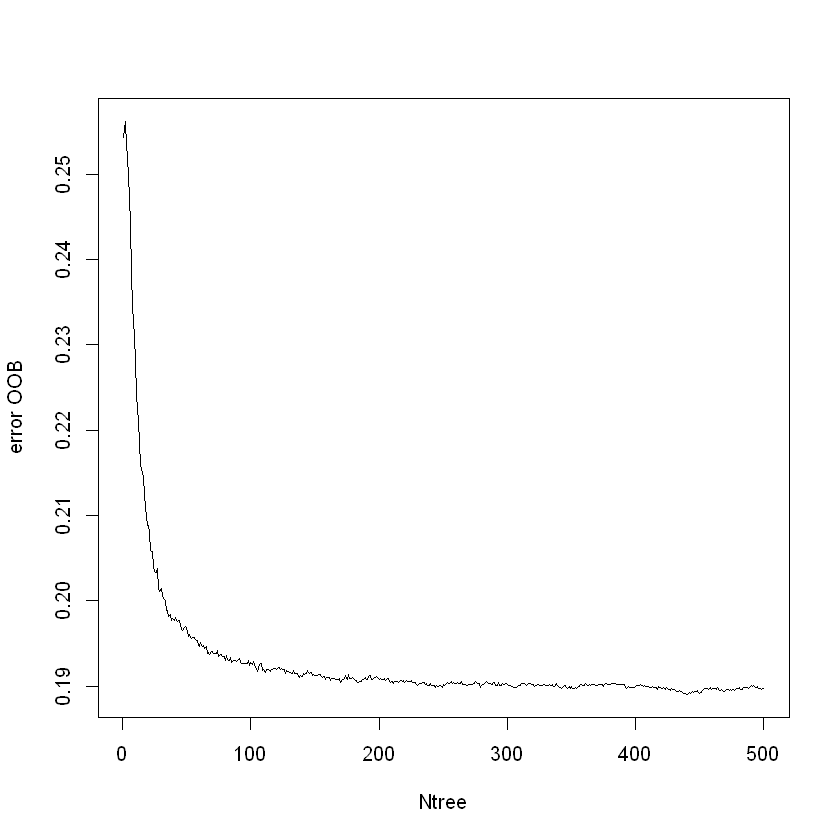

In [92]:
plot(model$err.rate[, 1], type = "l", xlab = "Ntree", ylab = "error OOB")

* We will choose ntree=350 since the OOB error start to stabilzed. 
* mtry defines the number of variables randomly sampled as candidates at each split. We will keep the default - sqrt(p) for our classification model (p:the number of feautres).

To confirm those results, we will use the same process used in nearest neighbours model.
We will start by keeping a minimum of 5 features and increasing this number until we used the 20 available features and vary the parameter ntree to see how classification rate evolves.

In [93]:
if(FALSE){ # remove this condition if you want to run the whole tests
rf_results <- read.csv("rf_results.csv")

ntree= c(100,250,300,350)

for(ntr in ntree){
    range <- 5:20
    for (i in range){
        for(fold in 1:10){
            ts_i <- folds[[fold]]
            tr_i <- setdiff(index,ts_i)
            cl <- data_labels[tr_i,"status_group"]
            ts_sol <- data_labels[ts_i,"status_group"]
            train <- data[tr_i,features[1:i]]
            test <- data[ts_i,features[1:i]]
            res <- randomForest(x=train,
                          y=cl,
                          xtest=test,
                          ytest=ts_sol,
                          ntree=ntr)
            e <-model$err.rate[ntr,1]
            new_line <- list(mtree_value=ntr, fold_number=fold, feature_number=i,class_rate=1-e)
           rf_results <- rbind(rf_results,new_line, stringsAsFactors=FALSE)
   
        }
    }
}

write.csv(rf_results,"rf_results.csv", row.names = FALSE,quote=FALSE)
}


In [98]:
rf_results <- read.csv("rf_results.csv")

grouped_rf <- rf_results %>%
  group_by(mtree_value,feature_number) %>%
  summarize(mean_class_rate = mean(class_rate, na.rm = TRUE))


head(grouped_rf %>% arrange(desc(mean_class_rate)))


`summarise()` has grouped output by 'mtree_value'. You can override using the `.groups` argument.


mtree_value,feature_number,mean_class_rate
300,5,0.8139544
300,6,0.8139544
300,7,0.8139544
300,8,0.8139544
300,9,0.8139544
300,10,0.8139544


We can see that the only parameter that seems to influence the classification success rate is ntree, the best classification rate is achieved with ntree = 300

### 2.2.3 tree/rpart (decision trees) <a class="anchor" id="12-bullet"></a>

#### Creating a basic model
Now we will create a basic decision tree model in order to get a first overview of its performance.

Subsequently, we will optimise the parameters of the model in order to improve its performance.

In [109]:
data <- read.csv("norm_training_set.csv")
#numeric_data <- read.csv("numerical_training_set.csv")
data_labels <- read.csv("training_set_labels.csv")

index <- 1:59400
fold_index <- 1:10
folds <- split(sample(index),1:10)
features <- selected


ts_index <- folds[[10]]
tr_index <- setdiff(index,ts_index)
train_solution <- data_labels[tr_index,"status_group"]
test_solution <- data_labels[ts_index,"status_group"]
train_data <- data[tr_index,features]
test_data <- data[ts_index,features]

RPART <- rpart(train_solution~., data=cbind(train_data, train_solution))

In [110]:
summary(RPART)

Call:
rpart(formula = train_solution ~ ., data = cbind(train_data, 
    train_solution))
  n= 53460 

          CP nsplit rel error    xerror        xstd
1 0.17962971      0 1.0000000 1.0000000 0.004708057
2 0.03776515      1 0.8203703 0.8203703 0.004576098
3 0.03445457      2 0.7826051 0.7826051 0.004530953
4 0.01698206      4 0.7136960 0.7136960 0.004431910
5 0.01000000      7 0.6624024 0.6630972 0.004344755

Variable importance
             quantity     construction_year            amount_tsh 
                   44                     9                     8 
extraction_type_group                source       waterpoint_type 
                    7                     7                     5 
             latitude          payment_type            management 
                    4                     4                     3 
               region        public_meeting                 basin 
                    2                     2                     1 
        district_code        

In [111]:
RPART

n= 53460 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 53460 24467 functional (0.542330715 0.073251029 0.384418257)  
   2) quantity< 0.5 44168 17416 functional (0.605687375 0.079265532 0.315047093)  
     4) amount_tsh>=4.285714e-06 14708  3917 functional (0.733682350 0.075061191 0.191256459) *
     5) amount_tsh< 4.285714e-06 29460 13499 functional (0.541785472 0.081364562 0.376849966)  
      10) construction_year< 0.2924528 22601  8962 functional (0.603468873 0.082651210 0.313879917)  
        20) source< 0.2142857 7366  2324 functional (0.684496335 0.100325821 0.215177844) *
        21) source>=0.2142857 15235  6638 functional (0.564292747 0.074105678 0.361601575)  
          42) extraction_type_group>=0.1363636 9822  3333 functional (0.660659743 0.077682753 0.261657504) *
          43) extraction_type_group< 0.1363636 5413  2474 non functional (0.389432847 0.067615001 0.542952152)  
            86) source>=0.6428571 2090   963 functional (0.539234

In [112]:
attributes(RPART)

$names
 [1] "frame"               "where"               "call"               
 [4] "terms"               "cptable"             "method"             
 [7] "parms"               "control"             "functions"          
[10] "numresp"             "splits"              "variable.importance"
[13] "y"                   "ordered"            

$xlevels
named list()

$ylevels
[1] "functional"              "functional needs repair"
[3] "non functional"         

$class
[1] "rpart"

#### Variable importance
It is interesting to look at the variables most involved in the decision process of the model.

In [113]:
RPART$variable.importance

quantity     construction_year            amount_tsh 
           3874.03515             757.81979             699.55771 
extraction_type_group                source       waterpoint_type 
            606.92766             577.80886             416.24356 
             latitude          payment_type            management 
            372.45516             372.04836             284.63983 
               region        public_meeting                 basin 
            181.19671             147.52877             121.37051 
        district_code             longitude         date_recorded 
            104.43267              76.51179              69.51360 
           gps_height           num_private 
             38.23882              10.55911

#### First predictions

Let's make some first predictions as well as a confusion matrix in order to know how accurate our basic model is

In [114]:
preds <- predict(RPART, test_data)
summary(preds)

   functional      functional needs repair non functional  
 Min.   :0.02486   Min.   :0.005683        Min.   :0.1913  
 1st Qu.:0.33853   1st Qu.:0.075061        1st Qu.:0.1913  
 Median :0.66066   Median :0.077125        Median :0.2617  
 Mean   :0.54560   Mean   :0.073267        Mean   :0.3811  
 3rd Qu.:0.73368   3rd Qu.:0.077683        3rd Qu.:0.5843  
 Max.   :0.73368   Max.   :0.124402        Max.   :0.9695  

In [115]:
t_fu = 0.6
t_nr = 0.02
Y_hat <- ifelse(preds[,1] > t_fu, "functional", ifelse(preds[,2] > t_nr, "functional needs repair", "non functional"))

confusion_matrix <- table(Y_hat,test_solution)
confusion_matrix

# compute misclassification rate
accuracy = (confusion_matrix[1,1]+confusion_matrix[2,2]+confusion_matrix[3,3])/sum(confusion_matrix)
misclassification_rate = 1 - accuracy
misclassification_rate

                         test_solution
Y_hat                     functional functional needs repair non functional
  functional                    2540                     257            805
  functional needs repair        709                     139            875
  non functional                  17                       5            593

[1] 0.4491582

#### First overview of the model



Classification tree:
rpart(formula = train_solution ~ ., data = cbind(train_data, 
    train_solution))

Variables actually used in tree construction:
[1] amount_tsh            construction_year     extraction_type_group
[4] quantity              source               

Root node error: 24467/53460 = 0.45767

n= 53460 

        CP nsplit rel error  xerror      xstd
1 0.179630      0   1.00000 1.00000 0.0047081
2 0.037765      1   0.82037 0.82037 0.0045761
3 0.034455      2   0.78261 0.78261 0.0045310
4 0.016982      4   0.71370 0.71370 0.0044319
5 0.010000      7   0.66240 0.66310 0.0043448
Call:
rpart(formula = train_solution ~ ., data = cbind(train_data, 
    train_solution))
  n= 53460 

          CP nsplit rel error    xerror        xstd
1 0.17962971      0 1.0000000 1.0000000 0.004708057
2 0.03776515      1 0.8203703 0.8203703 0.004576098
3 0.03445457      2 0.7826051 0.7826051 0.004530953
4 0.01698206      4 0.7136960 0.7136960 0.004431910
5 0.01000000      7 0.6624024 0.6630972 

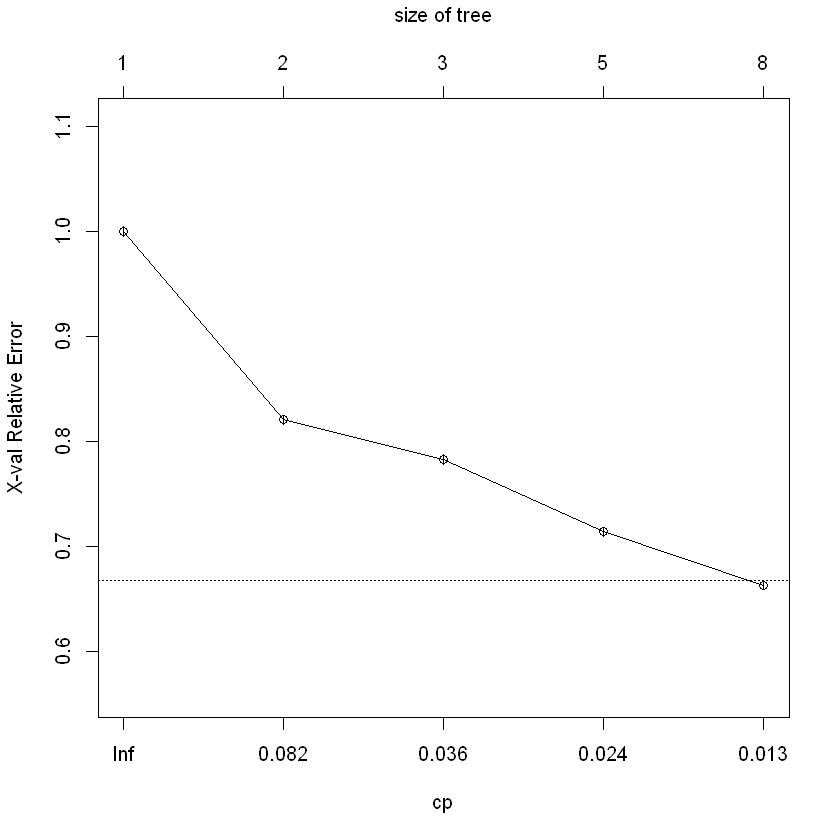

In [116]:
printcp(RPART) # display the results
plotcp(RPART) # visualize cross-validation results
summary(RPART) # detailed summary of splits

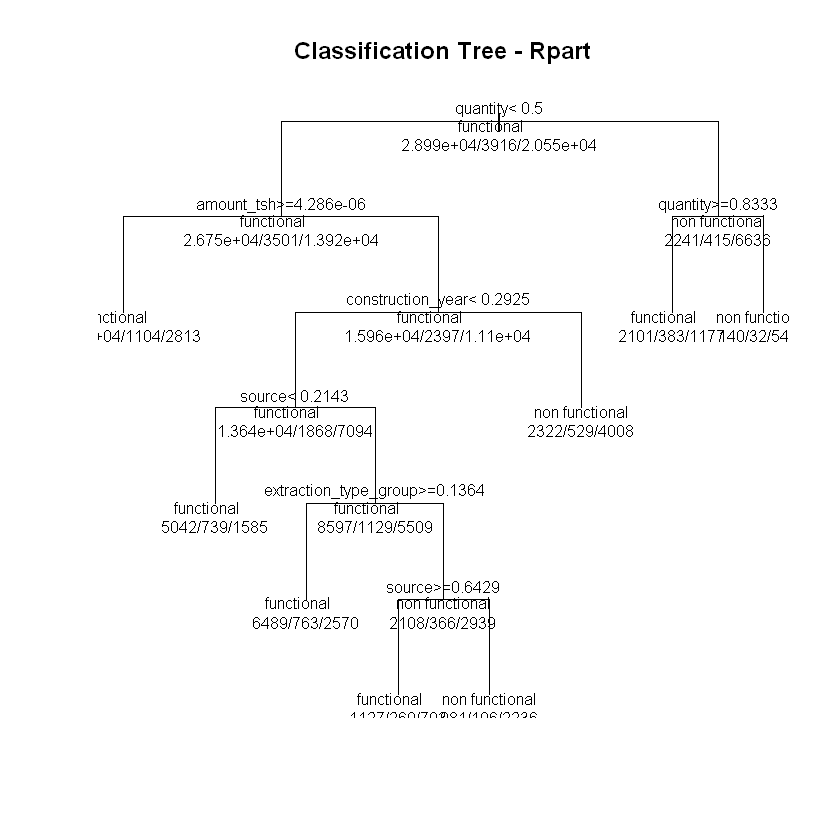

In [117]:
# plot tree
plot(RPART, uniform=TRUE,
   main="Classification Tree - Rpart")
text(RPART, use.n=TRUE, all=TRUE, cex=.8)

#### Tuning the model

After having realized our basic model, we will try to optimize the parameters of our model in order to improve its performance.

#### Search for optimal hyperparameters

In order to improve the performance of our model we can adjust different parameters: 
- The value of the "tresholds" --> Allowing to define for prediction values to which precise output these values refer
- The complexity parameter (cp) of our model which is an advisory parameter. It is specified according to the formula : <br>**Rcp(T) ≡ R(T) + cp ∗ |T| ∗ R(T1)** 
    <br> where T1 is the tree with no splits, |T| is the number of splits for a tree, and R is the risk. A value of cp = 1 will always result in a tree with no splits. The default
value of .01 has been reasonably successful at ‘pre-pruning’ trees so that the cross-validation
step need only remove 1 or 2 layers, but it sometimes over prunes, particularly for large
data sets. <br>(source of our documentation : https://cran.r-project.org/web/packages/rpart/vignettes/longintro.pdf) 
<br>
- The "maxdepth" parameter of our model --> allows to change the depth of the tree
- The "maxcompete" parameter of our model --> the number of competitor splits retained in the output.


The results of our search go into a **csv** file that we will analyse.



In [118]:
if(FALSE){ # remove this condition if you want to run the tests
rpart_results <- ""

threshold_opt_nr = c(0.02,0.01)
threshold_opt_fu = c(0.5, 0.6, 0.65)
cp_opt = c(0.01,0.02)
maxcompete_opt = c(4,8)
maxdepth_opt = c(20,30)
for(cp in cp_opt){
    for(maxcompete in maxcompete_opt){
        for(maxdepth in maxdepth_opt){
            for(threshold_fu in threshold_opt_fu){
                for(threshold_nr in threshold_opt_nr){
                    for (i in 5:20){
                        features <- selected
                        ts_index <- folds[[10]]
                        tr_index <- setdiff(index,ts_index)
                        train_solution <- data_labels[tr_index,"status_group"]
                        test_solution <- data_labels[ts_index,"status_group"]
                        train_data <- data[tr_index,features[1:i]]
                        test_data <- data[ts_index,features[1:i]]

                        fit_rpart <- rpart(train_solution~., data=cbind(train_data, train_solution), control = 
                                           rpart.control(cp = cp, maxcompete = maxcompete, maxdepth = maxdepth)) 

                        preds <- predict(fit_rpart, test_data)
                        t_fu = threshold_fu
                        t_nr = threshold_nr
                        Y_hat <- ifelse(preds[,1] > t_fu, "functional", ifelse(preds[,2] > t_nr, "functional needs repair", "non functional"))
                        confusion_matrix <- table(Y_hat,test_solution)
                        accuracy = (confusion_matrix[1,1]+confusion_matrix[2,2]+confusion_matrix[3,3])/sum(confusion_matrix)
                        e = 1 - accuracy
                        new_line <- list(cp = cp, maxcompete = maxcompete, maxdepth = maxdepth, threshold_fu = t_fu ,
                                         threshold_nr = t_nr, fold_number=10, feature_number=i, 
                                         misclassification_rate=e)    
                        rpart_results <- rbind(rpart_results,new_line)
                    }
                }
            }
        }
    }
}
write.csv(rpart_results,"rpart_results.csv", row.names = FALSE,quote=FALSE)
}

#### Analysis of the results of our research.

In [119]:
rpart_results <- read.csv("rpart_results.csv")

In [120]:
summary(rpart_results)

       cp          maxcompete    maxdepth   threshold_fu     threshold_nr  
 Min.   :0.010   Min.   :4    Min.   :20   Min.   :0.5000   Min.   :0.010  
 1st Qu.:0.010   1st Qu.:4    1st Qu.:20   1st Qu.:0.5000   1st Qu.:0.010  
 Median :0.015   Median :6    Median :25   Median :0.6000   Median :0.015  
 Mean   :0.015   Mean   :6    Mean   :25   Mean   :0.5833   Mean   :0.015  
 3rd Qu.:0.020   3rd Qu.:8    3rd Qu.:30   3rd Qu.:0.6500   3rd Qu.:0.020  
 Max.   :0.020   Max.   :8    Max.   :30   Max.   :0.6500   Max.   :0.020  
  fold_number feature_number  misclassification_rate
 Min.   :10   Min.   : 5.00   Min.   :0.3776        
 1st Qu.:10   1st Qu.: 8.75   1st Qu.:0.3857        
 Median :10   Median :12.50   Median :0.4067        
 Mean   :10   Mean   :12.50   Mean   :0.4013        
 3rd Qu.:10   3rd Qu.:16.25   3rd Qu.:0.4155        
 Max.   :10   Max.   :20.00   Max.   :0.4155        

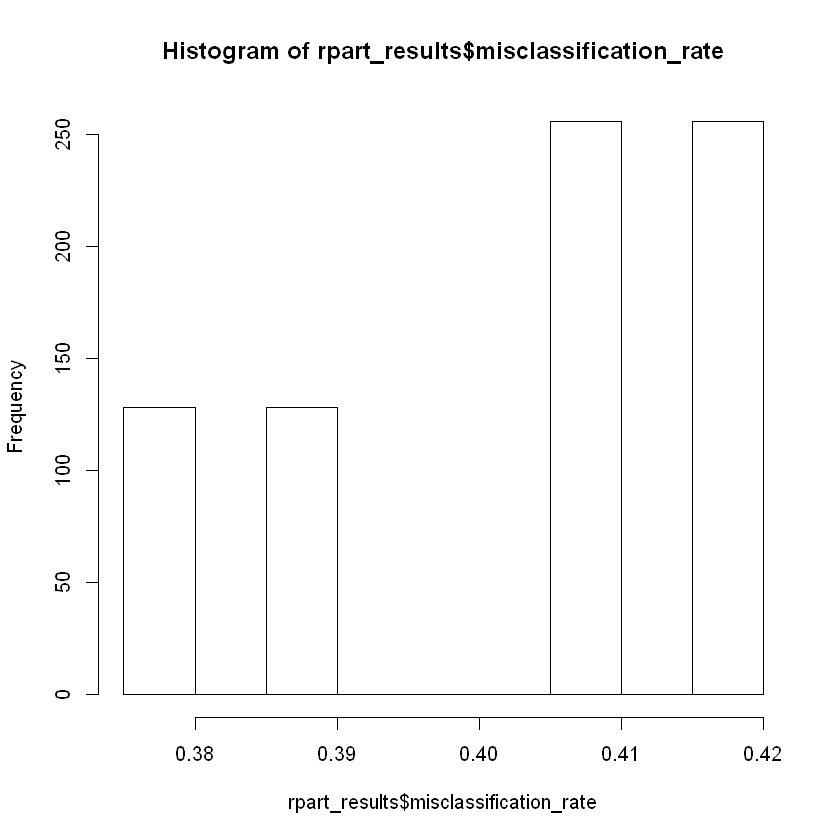

In [121]:
hist(rpart_results$misclassification_rate)

#### Lowest missclassification rate

We will now look for the model with the lowest missclassification rate

In [122]:
rpart_results[which.min(rpart_results$misclassification_rate),]

cp,maxcompete,maxdepth,threshold_fu,threshold_nr,fold_number,feature_number,misclassification_rate
0.01,4,20,0.5,0.02,10,5,0.3776094


The highest classification rate has thus been achieved with the following parameters : cp = 0.01, maxcompete = 4, maxdepth = 20, threshold_fu = 0.5, threshold_nr = 0.02 and number of features = 5

### Selecting the best model 

After obtaining the best parameters for each of our learning procedures, the most performing model in terms of classification rate was the random forest model (~ 81.39%) followed by nearest neighbors (~ 77.34%) and rpart (~ 62,24%)

# 3. Create models based on other R packages <a class="anchor" id="13-bullet"></a>

In this section we will implement 2 different learning procedures using other packages than the ones listed for the second part. The first package implemented will be linear discriminant analysis and neural networks from neuralnet. Since those methods, especially neural net were very intensive computationally we weren't able to tune the parameters due to time constraints. But even though no parameter tuning was done we still obtain correct results with 63% accuracy for LDA and 60.3% accuracy for neuralnet.

## 3.1 Caret <a class="anchor" id="14-bullet"></a>

In [17]:
training_set <- read.csv("norm_training_set.csv")
n <- ncol(training_set)
n_var <- n-1
training_set_vars <- training_set[,1:n_var]
training_set_out <- training_set[,n]
correlation<-abs(cor(training_set_vars,training_set_out))
feature_set <- vector("list", length(n_var))
selected<-c()
candidates<-1:n_var

for (j in 1:n_var) {
    redundancy_score<-numeric(length(candidates))
        
    if (length(selected)>0) {
        cor_selected_candidates<-cor(training_set_vars[,selected,drop=F],training_set_vars[,candidates,drop=F])
        redundancy_score<-apply(cor_selected_candidates,2,mean)
    }
        
    # mRMR: minimum Redundancy Maximum Relevancy
    mRMR_score<-correlation[candidates]-redundancy_score
        
    selected_current<-candidates[which.max(mRMR_score)]
    selected<-c(selected,selected_current)
        
    candidates<-setdiff(candidates,selected_current)
    
    feature_set[[j]] <- selected
}
selected

[1] 18  4  2 20  5 16 15 13  1 10  3 17 12 11 14 19  6  8  7  9

In [18]:
data <- read.csv("norm_training_set.csv")
#numeric_data <- read.csv("numerical_training_set.csv")
data_labels <- read.csv("training_set_labels.csv")

index <- 1:59400
fold_index <- 1:10
folds <- split(sample(index),1:10)
features <- selected


ts_index <- folds[[10]]
tr_index <- setdiff(index,ts_index)
train_solution <- data_labels[tr_index,"status_group"]
test_solution <- data_labels[ts_index,"status_group"]
train_data <- data[tr_index,features]
test_data <- data[ts_index,features]

In [19]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

# a) linear algorithms
lda_model <- train(train_solution~., data=cbind(train_data, train_solution), method="lda", metric=metric, trControl=control)

In [20]:
lda_model

Linear Discriminant Analysis 

53460 samples
   20 predictor
    3 classes: 'functional', 'functional needs repair', 'non functional' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 48114, 48114, 48114, 48114, 48114, 48114, ... 
Resampling results:

  Accuracy   Kappa    
  0.6317059  0.2659945


In [106]:
# estimate skill of LDA on the validation dataset
predictions <- predict(lda_model, test_data)
confusionMatrix(predictions, test_solution)

Confusion Matrix and Statistics

                         Reference
Prediction                functional functional needs repair non functional
  functional                    2689                     330           1288
  functional needs repair          0                       0              0
  non functional                 520                      97           1016

Overall Statistics
                                          
               Accuracy : 0.6237          
                 95% CI : (0.6113, 0.6361)
    No Information Rate : 0.5402          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2499          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: functional Class: functional needs repair
Sensitivity                     0.8380                        0.00000
Specificity                     0.4075                    

## 3.2 Neural Net <a class="anchor" id="15-bullet"></a>

In [91]:
training_set <- cbind(train_data, train_solution)
dim(training_set)

[1] 53460    21

In [92]:
neuralnet_model <- neuralnet(train_solution~., training_set, hidden=3, act.fct = "logistic",  
                             threshold=0.1,stepmax=1e7, linear.output=TRUE)

In [104]:
preds <- predict(neuralnet_model,test_data)

t_fu = mean(preds[,1])
t_nr = mean(preds[,2])
Y_hat <- ifelse(preds[,1] > t_fu, "functional", ifelse(preds[,2] > t_nr, "functional needs repair", "non functional"))

confusion_matrix <- table(Y_hat,test_solution)
confusion_matrix

# compute misclassification rate
accuracy = (confusion_matrix[1,1]+confusion_matrix[2,2]+confusion_matrix[3,3])/sum(confusion_matrix)
misclassification_rate = 1 - accuracy
misclassification_rate
1-misclassification_rate

                         test_solution
Y_hat                     functional functional needs repair non functional
  functional                    2177                     273            706
  functional needs repair        233                      63            256
  non functional                 799                      91           1342

[1] 0.3969697

[1] 0.6030303

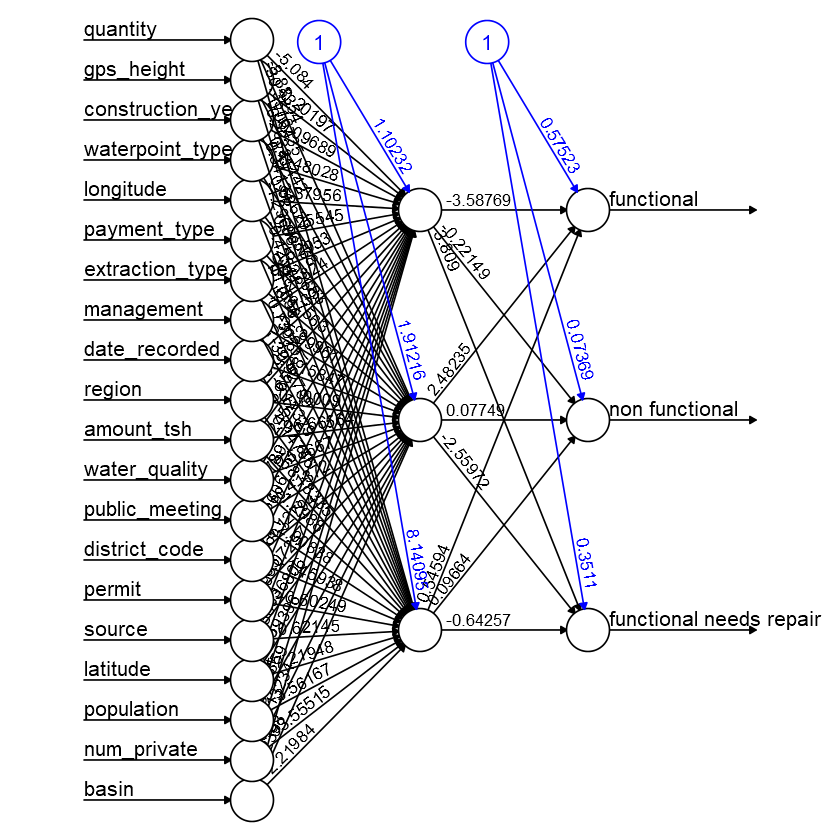

In [105]:
plot(neuralnet_model, rep = "best")

## 4 Submission

- Our best score is 0.8123
- Current rank is 1949

We got this rank by using the prediction of RandomForest model